# Proyecto Número 1: Análisis de mercado inmobiliario

## Alumno: Bruno Velcheff
## Grupo: 43

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* <b> En la Parte 1</b> presentaré la problemática sobre la cual voy a trabajar. En esta sección explicaré qué datos me ayudarán a trabajar en este problema.
* <b> En la Parte 2 </b> realizaré un Análisis Exploratorio de Datos sobre un dataset provisto para este proyecto.
* <b> En la Parte 3 </b> utilizaré herramientas de Machine Learning para predecir la variable de interés.

Los datos que utilizaré para realizar este proyecto provienen un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

*Durante el flujo de trabajo de este Notebook, transcribiré las consignas solicitadas para la realización del proyecto e iré resolviendolas una a una*

<h2 style="color:red">Parte 1: Pensando como un/a Data Scientist</h2>

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

<h2 style="color:green">Parte 1: Resolución</h2>

Las características que considero mas relevantes para trabajar en dicho problema serían:

* El tipo de Propiedad
* La cantidad de metros cuadrados de la misma
* La ubicación en la que se emplaza
* La cantidad de ambientes que posee
* La antigüedad del inmueble

Basándome en el manejo tradicional del mercado inmobiliario, entiendo que esos datos son los principales componentes del precio, además son facilmente recopilables, e interpretables para un modelo de Machine Learning.

A su vez, considero que sería importante consultar a los tasadores a cerca de su opinión respecto a ésta enumeración y si consideran que alguna de esas características es irrelevante o si tienen otros datos de interés para sugerir, ya que ellos poseen un conocimiento mucho más pormenorizado del dominio y eso es fundamental, por lo que no  debe ser pasado por alto si se encuentra disponible. *Tieniendo en claro siempre que **nuestra función como Data Scientists es aportar nuevas herramientas para resolver un problema**, por lo que su opinión sería escuchada, pero no vinculante en absoluto.*

Por ultimo, es de público conocimiento que éste mercado en particular se ve sensiblemente afectado en las sucesivas épocas de crisis y devaluaciones que reiteradamente acosan a nuestro país. Por lo tanto, propondría que el modelo pueda entrenarse con distintos datos según la época (o crear una nueva variable que contemple ésta peculiaridad), para que sea mas flexible y pueda adaptarse mejor a la época en que se utilice, logrando una mayor presición y generalización.


<h2 style="color:red">Parte 2: Análisis Exploratorio de Datos</h2>

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

<h2 style="color:green">Parte 2: Resolución</h2>

#### Comenzamos importando las librerías que necesitamos para realizar un **Análisis Exploratorio de Datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### A Continuación:
* procederemos a cargar el dataset que vamos a utilizar para éste proyecto
* verificaremos cuantas filas y columnas tiene el mismo
* imprimiremos por pantalla las primeras cinco filas para ver como luce

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'DS_Proyecto_01_Datos_Properati.csv'

In [7]:
print('El dataset está compuesto por '+str(data.shape[1])+' columnas, y '+str(data.shape[0])+' filas')

El dataset está compuesto por 19 columnas, y 146660 filas


In [20]:
print('Aquí podemos ver como lucen las cinco primeras filas con todas sus columnas:','\n')
data.head()

Aquí podemos ver como lucen las cinco primeras filas con todas sus columnas: 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### Listaremos los nombres de todas las columnas y cuantos valores faltantes tienen las mismas (si es que tienen)

In [145]:
print('Imprimimos por pantalla todas las Columnas del Dataset y verificamos la existencia o no de valores faltantes:','\n')
data.isna().sum()

Imprimimos por pantalla todas las Columnas del Dataset y verificamos la existencia o no de valores faltantes: 



start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

#### Detallamos todos los Tipos de Propiedad existentes en el dataset y la cantidad de instancias que corresponden a cada uno

In [147]:
print('El dataset cuenta con ',len(data.property_type.unique()), ' tipos  diferentes de propiedades')
print('\n')
print('Cantidad de instancias de cada tipo:','\n')
print(data.property_type.value_counts())

El dataset cuenta con  10  tipos  diferentes de propiedades


Cantidad de instancias de cada tipo: 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


#### Gaficamos esta información para hacerla visualmente interpretable:

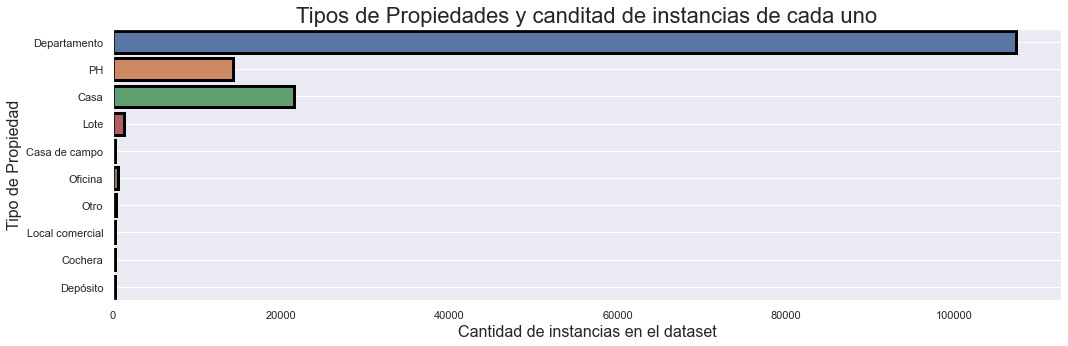

In [149]:
plt.figure(figsize = (17, 5))
sns.countplot(data = data, y = "property_type", linewidth= 3,edgecolor='black')
plt.title('Tipos de Propiedades y canditad de instancias de cada uno', fontsize = 22)
plt.ylabel('Tipo de Propiedad', fontsize = 16)
plt.xlabel('Cantidad de instancias en el dataset', fontsize = 16)
plt.grid()
plt.show()

#### Luego de visualizar las propiedades por su tipo, ahora las visualizaremos de acuerdo a la región en donde se ubican:

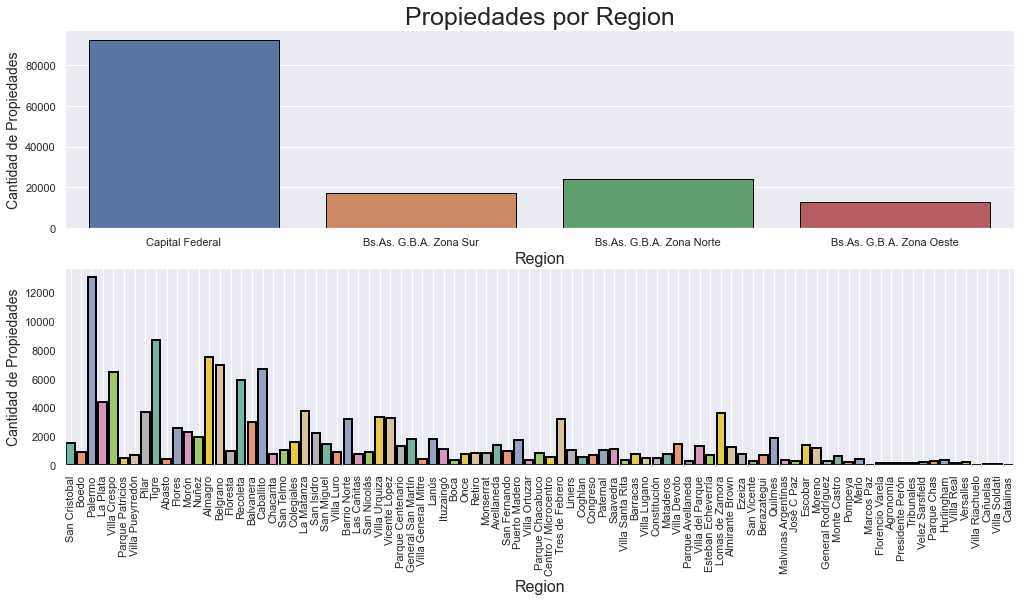

In [153]:
plt.figure(figsize = (17,8))
plt.subplot(2,1,1)
plt.title('Propiedades por Region', fontsize = 25)
sns.countplot(data.l2,linewidth= 1,edgecolor='black')
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Cantidad de Propiedades', fontsize = 14)

plt.subplot(2,1,2)
plt.xticks(rotation = 90)
sns.countplot(data.l3, linewidth= 2,edgecolor='black', palette="Set2")
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Cantidad de Propiedades', fontsize = 14)
plt.grid()
plt.show()

#### Con un panorama un poco más claro, crearemos un nuevo Data Frame utilizando:
* Los tres tipos de propiedad más relevantes (en cuanto a su cantidad)
* La región con más propiedades publicadas

In [33]:
data_filter = data[(data.property_type.isin(['Departamento','PH','Casa']) & (data.l2 == 'Capital Federal'))]
print('El nuevo Data Frame creado tiene la siguiente cantidad de filas y columnas:',data_filter.shape)

El nuevo Data Frame creado tiene la siguiente forma: (91485, 19)


#### Del nuevo Data Frame tomaremos las features `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `property_type`, `price` y realizaremos una limpieza de datos:
* Generaremos datos estadísticos que sirvan para tener una primera idea de los valores que abarcan estas variables.
* Eliminaremos valores atípicos (en los minimos y en los máximos de cada feature) que distorcionen la visualización de los Datos y puedan afectar al futuro modelo de Machine Learning con información incorrecta.
* Verificaremos que `surface_covered` no sea mayor a `surface_total` en ninguna propiedad, ya que no es facticamente posible. Si eso sucede, solucionaremos esos errores.
* Estudiaremos la distribución de la variable 'price' en busca de obtener una distribución de valores razonable.
* Una vez depurado el Data Frame visualizaremos su forma final para asegurarnos que este correctamente filtrado

In [34]:
sub_data = data_filter[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type', 'price']]

#### Aquí podemos ver una primera aproximación a la composición y distribución de los datos en éste Data Frame

In [35]:
sub_data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


#### Teniendo como guía esta descripción:
* visualizaremos el rango de valores original de cada feature, separandolos por tipo de propiedad
* estableceremos mínimos y máximos razonables para evitar los outliers
* corroboraremos mediante la función '.shape' que el fitro aplicado no afecte sustancialmente el tamaño de nuestro Data Frame, filtrando demasiadas instancias
* realizaremos una nueva visualización para asegurarnos que el nuevo rango sea correcto

#### Comenzamos con la columna `surface_total`:

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

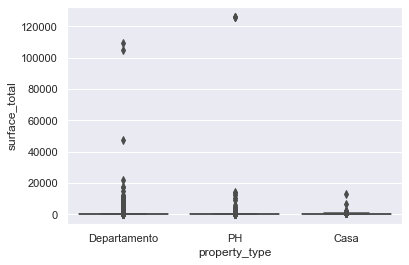

In [36]:
sns.boxplot(data = sub_data, y = 'surface_total', x = 'property_type')

In [37]:
lim_up = 180
lim_un = 30

mask = np.logical_and(sub_data.surface_total < lim_up, sub_data.surface_total > lim_un)
sub_data2 = sub_data[mask]

sub_data2.shape

(71959, 7)

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

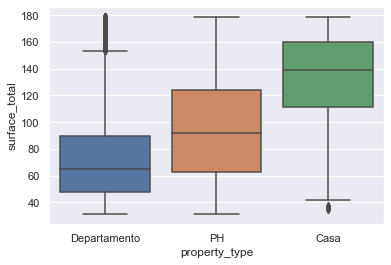

In [38]:
sns.boxplot(data = sub_data2, y = 'surface_total', x = 'property_type')

#### Aplicamos la misma operación a las demás columnas:

#### Visualizamos y filtramos la columna `price` :

<AxesSubplot:xlabel='property_type', ylabel='price'>

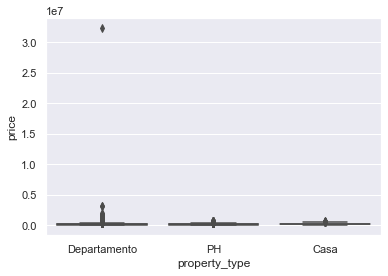

In [40]:
sns.boxplot(data = sub_data2, y = 'price', x = 'property_type')

In [41]:
under = 50000
up = 410000

filtro = np.logical_and(sub_data2.price > under, sub_data2.price < up)
sub_data2 = sub_data2[filtro]

sub_data2.shape

(65771, 7)

<AxesSubplot:xlabel='property_type', ylabel='price'>

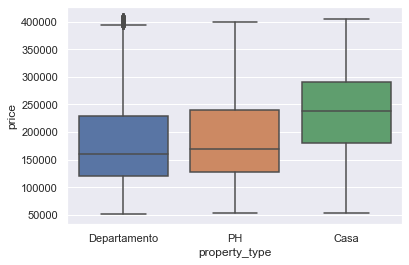

In [42]:
sns.boxplot(data = sub_data2, y = 'price', x = 'property_type')

#### Visualizamos y filtramos la columna `rooms` :

<AxesSubplot:xlabel='property_type', ylabel='rooms'>

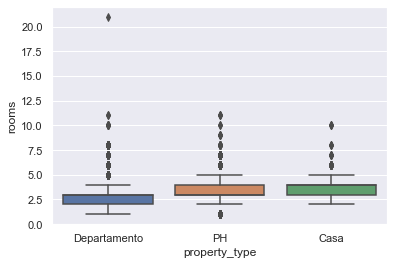

In [43]:
sns.boxplot(data = sub_data2, y = 'rooms', x = 'property_type')

In [44]:
max = 5

filtro = sub_data2.rooms <= max
sub_data2 = sub_data2[filtro]

sub_data2.shape

(65353, 7)

<AxesSubplot:xlabel='property_type', ylabel='rooms'>

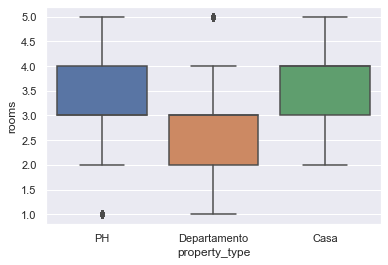

In [45]:
sns.boxplot(data = sub_data2, y = 'rooms', x = 'property_type')

#### Visualizamos y filtramos la columna `bedrooms`:

<AxesSubplot:xlabel='property_type', ylabel='bedrooms'>

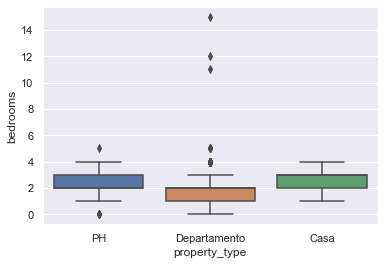

In [46]:
sns.boxplot(data = sub_data2, y = 'bedrooms', x = 'property_type')

In [47]:
limit = 4

filtro = sub_data2.bedrooms <= limit
sub_data2 = sub_data2[filtro]

sub_data2.shape

(65344, 7)

<AxesSubplot:xlabel='property_type', ylabel='bedrooms'>

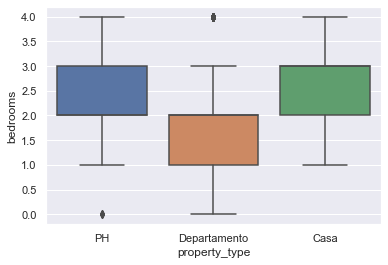

In [48]:
sns.boxplot(data = sub_data2, y = 'bedrooms', x = 'property_type')

#### Visualizamos y filtramos la columna `bathrooms`:

<AxesSubplot:xlabel='property_type', ylabel='bathrooms'>

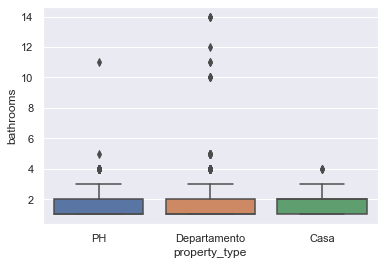

In [49]:
sns.boxplot(data = sub_data2, y = 'bathrooms', x = 'property_type')

In [50]:
limit = 4

filtro = sub_data2.bathrooms <= limit
sub_data2 = sub_data2[filtro]

sub_data2.shape

(64654, 7)

<AxesSubplot:xlabel='property_type', ylabel='bathrooms'>

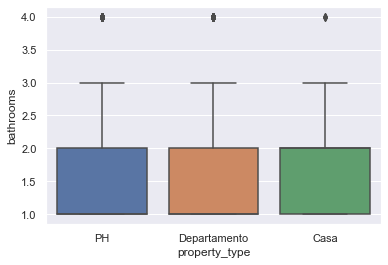

In [51]:
sns.boxplot(data = sub_data2, y = 'bathrooms', x = 'property_type')

#### *Podemos apreciar como en cada una de las features, el primer boxplot se ve aplastado a causa de los outliers y en el segundo boxplot se evidencia una notable mejoría en la distribución de los datos y consecuentemente en su visualización*

#### Eliminamos las filas cuya superficie cubierta es superior a la total por contener información errónea:

In [53]:
filt = sub_data2.surface_total >= sub_data2.surface_covered
sub_data2 = sub_data2[filt]

sub_data2.shape

(64654, 7)

#### Volvemos a revisar la composición general del Data Frame para observar los cambios

In [55]:
sub_data2.describe().apply(lambda s: s.apply(lambda x: (format(x, 'g'))))

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,64654,64654,64654,64654,64654,64654
mean,2.72528,1.7768,1.33675,71.6076,63.3607,180855
std,0.93813,0.812908,0.57436,30.8267,26.3186,78509.3
min,1,0,1,31,2,51000
25%,2,1,1,48,43,120000
50%,3,2,1,64,57,163000
75%,3,2,2,88,77,230000
max,5,4,4,179,178,409000


#### *Nótese que la distribución de los datos se asemeja mucho mas a la normal y tanto los máximos como los mínimos lucen mas razonables y cercanos en cada una de las features*

#### Graficamos el Data Frame filtrado para observar sus correlaciones

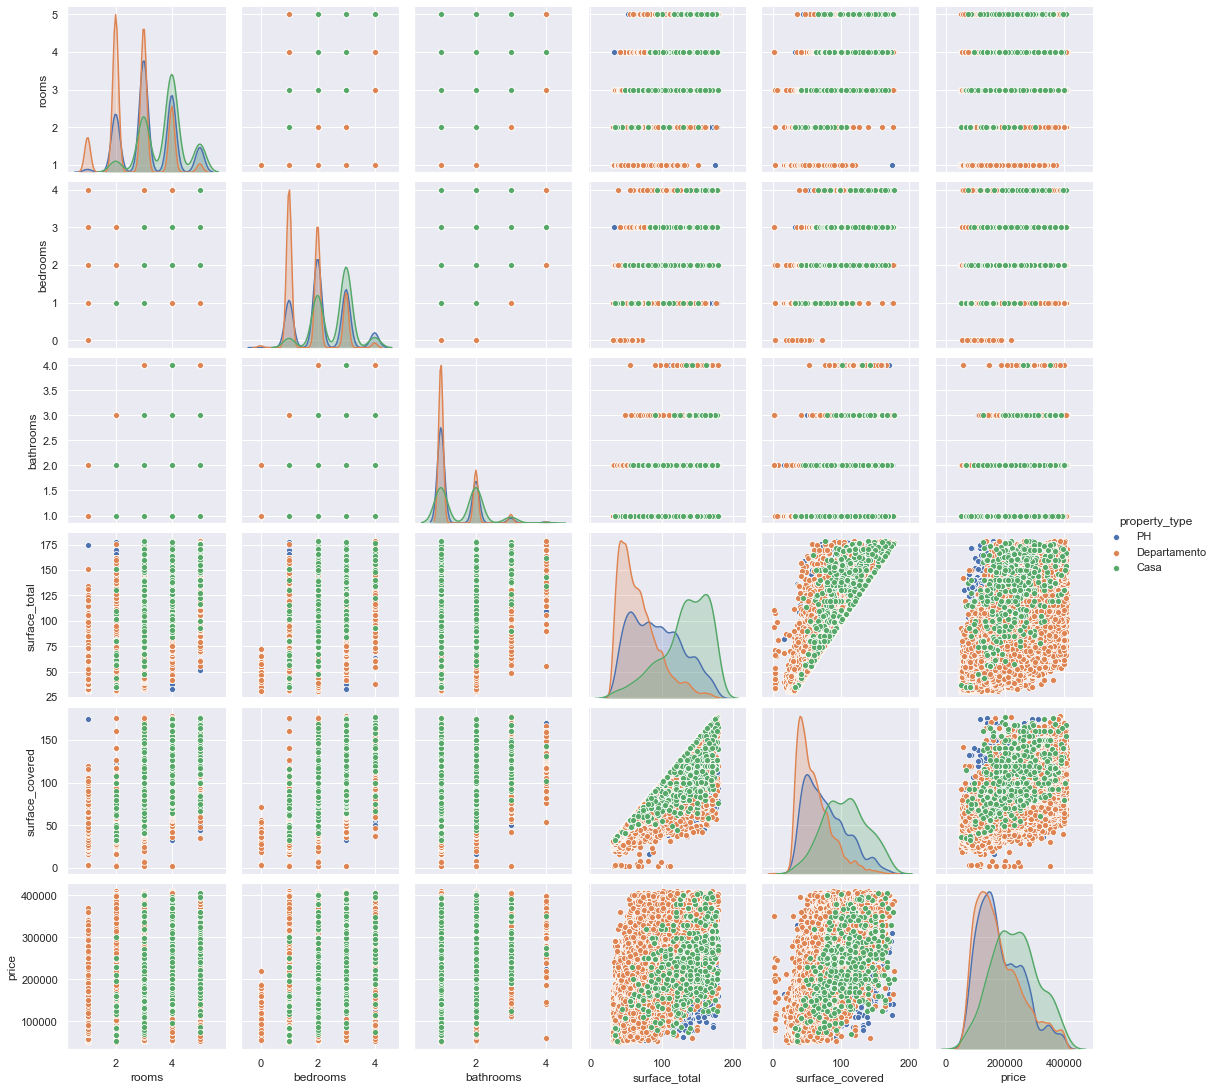

In [56]:
sns.pairplot(data = sub_data2, hue='property_type')

#### * *Podemos observar que, al tener pocos valores entre los que se pueden distribuir (de 1 a 5), las variables de `rooms`, `bedrooms` y `bathrooms` lucen de un modo muy peculiar*
#### * *Además, vale la pena destacar que ninguna columna se ve demasiado correlacionada con otra, siendo lo más cercano el caso de `surface_total` y `surface_covered`*

#### Procedemos a examinar las **correlaciones** entre las distintas columnas de manera mas pormenorizada

In [57]:
sub_data2.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.941451,0.499109,0.738016,0.788491,0.566373
bedrooms,0.941451,1.000000,0.507297,0.732262,0.787918,0.555696
bathrooms,0.499109,0.507297,1.000000,0.566417,0.602756,0.583391
surface_total,0.738016,0.732262,0.566417,1.000000,0.913724,0.714447
surface_covered,0.788491,0.787918,0.602756,0.913724,1.000000,0.724777
price,0.566373,0.555696,0.583391,0.714447,0.724777,1.000000


#### Visualizamos las Correlaciones en General, y luego segun el Tipo de Propiedad

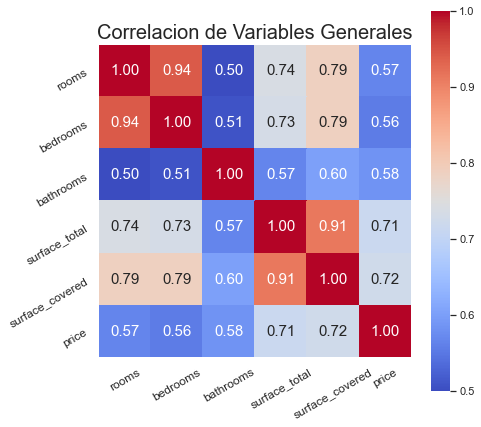

In [61]:
corr = sub_data2.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap= 'coolwarm', cbar = True,  square = True, annot=True,fmt= '.2f', annot_kws={'size': 15})
plt.title('Correlacion de Variables Generales', fontsize=20)
plt.xticks(rotation = 30, fontsize=12)
plt.yticks(rotation = 30, fontsize=12)
plt.show()

In [67]:
filtro1 = sub_data2.property_type == 'Casa'
sd_casa = sub_data2[filtro1]
print('Cantidad de instancias de tipo Casa:',sd_casa.shape)

filtro2 = sub_data2.property_type == 'Departamento'
sd_dpto = sub_data2[filtro2]
print('Cantidad de instancias de tipo Departamento:',sd_dpto.shape)

filtro3 = sub_data2.property_type == 'PH'
sd_PH = sub_data2[filtro3]
print('Cantidad de instancias de tipo PH:',sd_PH.shape)

Cantidad de instancias de tipo Casa: (527, 7)
Cantidad de instancias de tipo Departamento: (56693, 7)
Cantidad de instancias de tipo PH: (7434, 7)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'rooms'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'surface_total'),
  Text(0, 4.5, 'surface_covered'),
  Text(0, 5.5, 'price')])

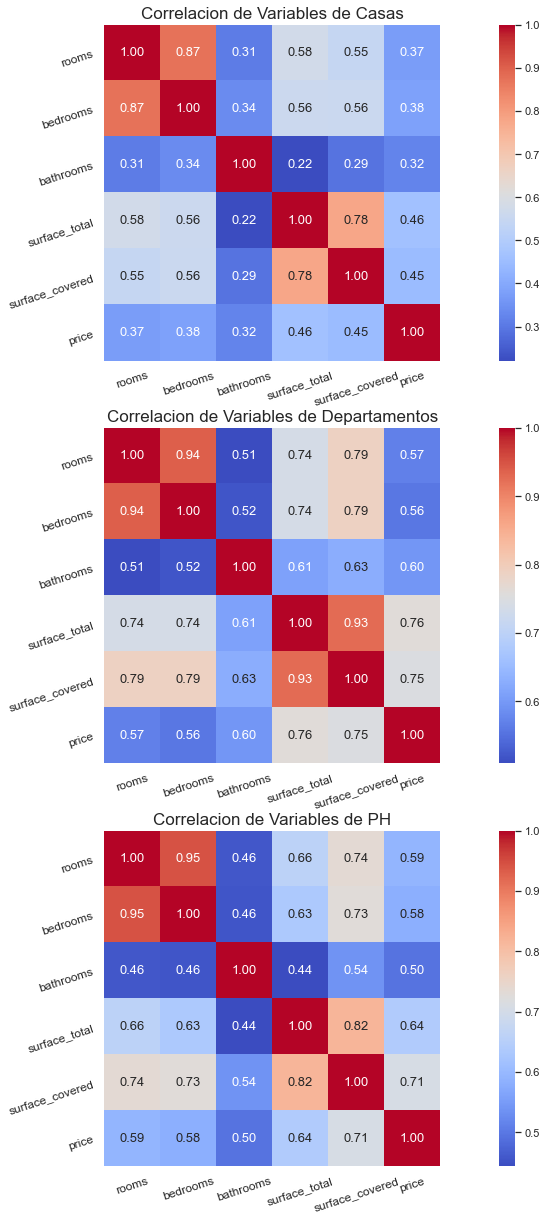

In [66]:
plt.figure(figsize = (7*3,7*3))
plt.subplot(3,1,1)
corr = sd_casa.corr()
sns.heatmap(corr, cmap= 'coolwarm', cbar = True,  square = True, annot=True,fmt= '.2f', annot_kws={'size': 13})
plt.title('Correlacion de Variables de Casas', fontsize=17)
plt.xticks(rotation = 18, fontsize=12)
plt.yticks(rotation = 18, fontsize=12)

plt.subplot(3,1,2)
corr = sd_dpto.corr()
sns.heatmap(corr, cmap= 'coolwarm', cbar = True,  square = True, annot=True,fmt= '.2f', annot_kws={'size': 13})
plt.title('Correlacion de Variables de Departamentos', fontsize=17)
plt.xticks(rotation = 18, fontsize=12)
plt.yticks(rotation = 18, fontsize=12)

plt.subplot(3,1,3)
corr = sd_PH.corr()
sns.heatmap(corr, cmap= 'coolwarm', cbar = True,  square = True, annot=True,fmt= '.2f', annot_kws={'size': 13})
plt.title('Correlacion de Variables de PH', fontsize=17)
plt.xticks(rotation = 18, fontsize=12)
plt.yticks(rotation = 18, fontsize=12)

#### * *Nótese que la visualización de las correlaciones entre columnas nos permite confirmar la correlación existente entre las columnas `surface_total` y `surface_covered`, aunque la misma es en mi opinión mayor de lo que el pairplot daba a entender*

#### * *A su vez, gracias a ésta herramienta, logramos advertir otra fuerte correlación entre las columnas `rooms` y `bedrooms`*

#### * *Cabe destacar que dicha correlación es mucho menor en la clase 'Casa' en comparación con lo que sucede en las clases 'Departamento' y 'PH', las cuales además son mucho mas relevantes al ser notoriamente mayoritarias en cantidad (sobre todo 'Departamento')*

#### * *Por último, vale la pena mencionar que, de manera similar a lo que sucede con la clase 'Casa' y la correlación entre las variables `rooms` y `bedrooms`, podemos observar que en la clase 'PH', la correlación entre las variables `surface_total` y `surface_covered` es particularmente más débil que en las otras dos clases*

<h2 style="color:red">Parte 2.1: Desafío</h2>
Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

<h2 style="color:green">Parte 2.1: Resolución</h2>

#### Me propuse averiguar si existe algun barrio en la Capital Federal o Gran Buenos Aires donde los inmuebles sean donde las propiedades sean particularmente mayores (o menores) en su superficie, para ello realizaré un gráfico donde se pueda visualizar la superficie total de las propiedades discriminadas por cada barrio

Volvemos a cargar del Dataset completo

In [103]:
bonus = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

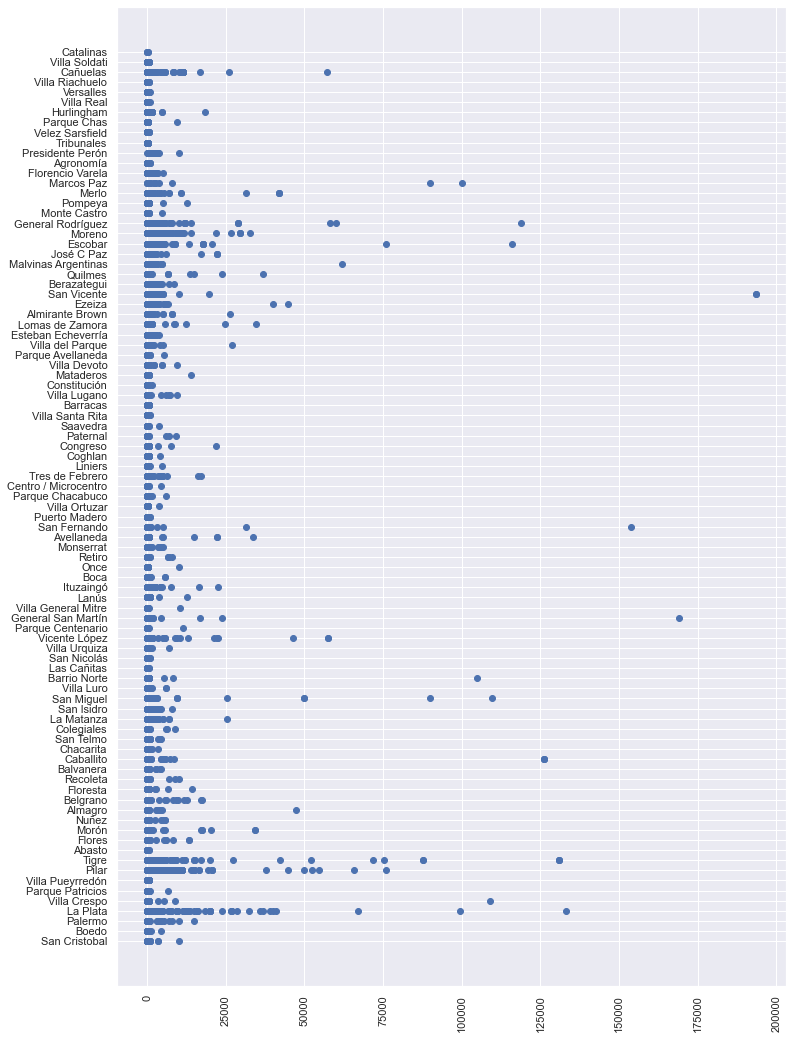

In [104]:
X = bonus.l3
y = bonus.surface_total

plt.figure(figsize = (12, 18))
plt.xticks(rotation = 90)
plt.scatter(y,X)

#### *A primera vista el grafico no parece brindar información particularmente interesante, aunque se ve que los datos generales han sido achatados hacia la izquierda del grafico a causa de outliers distribuidos a lo largo de los barrios*

#### Corregiermos este problema modificando los límites del gráfico y volveremos a visualizar:

(0.0, 45000.0)

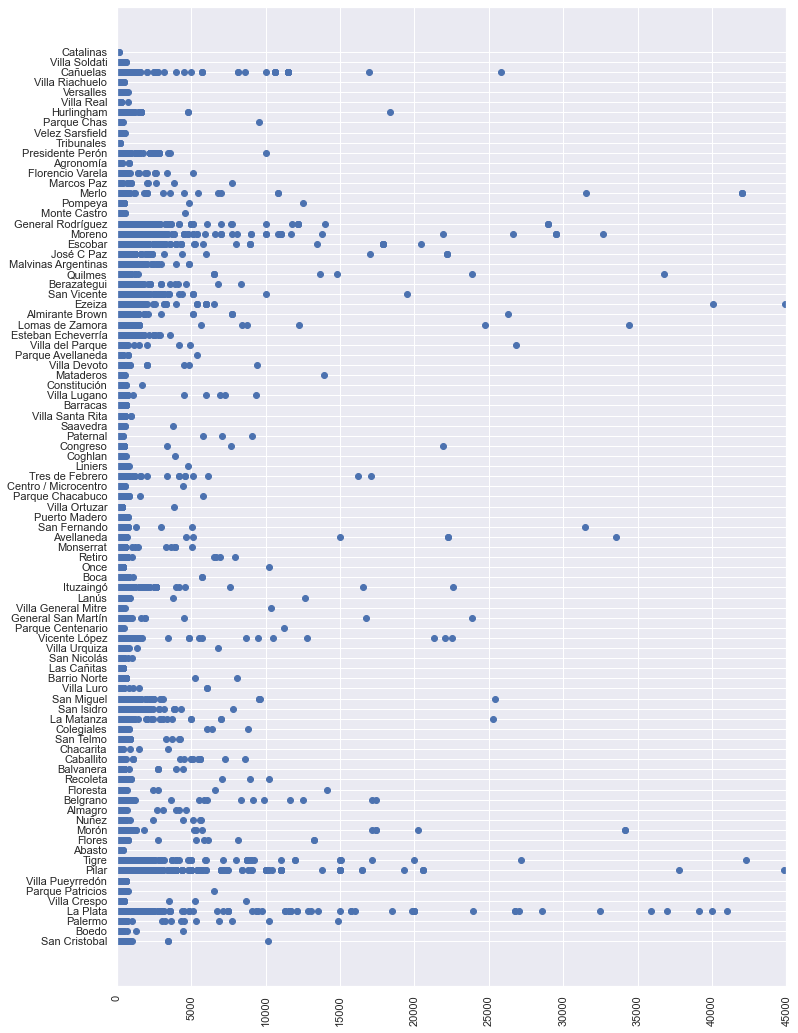

In [106]:
X = bonus.l3
y = bonus.surface_total

plt.figure(figsize = (12, 18))
plt.xticks(rotation = 90)
plt.scatter(y,X)
plt.xlim(0, 45000)

#### *Con los nuevos límites, el gráfico aparece un poco más expandido aunque aún se aprecia una gran concentración de instancias en el lado izquierdo del eje X, donde se encuentran las propiedades de menor superficie*

#### *Esto parece ser causado porque la mayoría de las propiedades publicadas en el dataset son departamentos*

#### *Aún así, la zona de 'La Plata' parece ser la única en donde se asientan consistentemente propiedades mas allá de la zona izquierda del gáfico, no siendo solo unos pocos puntos aislados como en el resto de las instancias*

#### *Ésto podría deberse a que allí hay propiedades con mayor superficie o simplemente a que 'La Plata' cuenta con más propiedades publicadas y eso haría que haya más posibilidades de encontrar más propiedades grandes allí*

#### Para comprobar ésta hipótesis:
* graficaremos la cantidad de propiedades que hay en cada zona a fin de corroborarla o desmentirla
* comprobaremos el promedio de publicaciones que hay para todas las zonas
* comprobaremos la cantidad de publicaciones que hay para la ciudad de La Plata
* comprobaremos la cantidad de publicaciones que hay en la zona con mayor cantidad de propiedades 

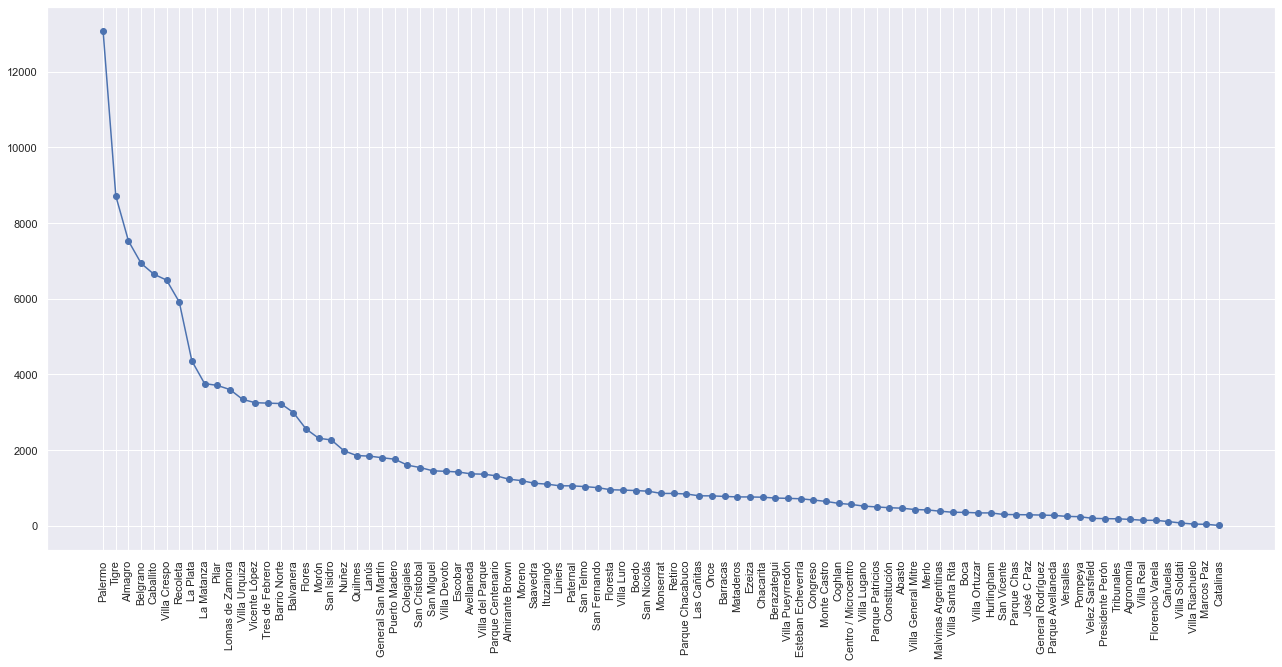

In [114]:
plt.figure(figsize = (22,10))
plt.xticks(rotation = 90)
plt.plot(zone,'o-',label='train' )

In [122]:
zone = bonus.l3.value_counts()
lp = zone['La Plata']
pl = zone['Palermo']
print('El promedio de propiedades publicadas por zona es:', zone.mean())
print('\n')
print('La cantidad de propiedades publicadas en la ciudad de La Plata es de:', lp.sum())
print('\n')
print('La cantidad de propiedades publicadas en el barrio de Palermo, que es el que tiene mayor cantidad, es de:', pl.sum())

El promedio de propiedades publicadas por zona es: 1647.8651685393259


La cantidad de propiedades publicadas en la ciudad de La Plata es de: 4354


La cantidad de propiedades publicadas en el barrio de Palermo, que es el que tiene mayor cantidad, es de: 13073


#### *Notamos que la cantidad de propiedades publicadas en 'La Plata' es mayor al doble del promedio (1.647), pero aun así es recién la octava zona con más propiedades en el dataset con 4.354 publicaciones, las que no llegan a constituir un tercio de las 13.073 propiedades publicadas en 'Palermo', la zona con mayor cantidad.* **Por lo tanto queda descartada la hipótesis original.**

#### Una nueva hipótesis es que al ser 'La Plata' una ciudad en las afueras del Gran Buenos Aires, y 'Palermo' un barrio de la Capital Federal, es probable que la primera cuente con mayor proporción de casas que el segundo. Para comprobarla investigaremos por que tipos de propiedad está compuesto cada uno:

In [126]:
data_filter = bonus[(bonus.l3.isin(['La Plata']))]
data_filter.shape

(4354, 19)

In [141]:
print('Composición de Propiedades publicadas en La Plata discriminadas por su tipo:')
print('\n')
data_filter.property_type.value_counts()

Composición de Propiedades publicadas en La Plata discriminadas por su tipo:




Departamento       2141
Casa               1686
PH                  420
Lote                 55
Otro                 22
Oficina              13
Casa de campo        13
Cochera               2
Depósito              1
Local comercial       1
Name: property_type, dtype: int64

In [129]:
data_filter2 = bonus[(bonus.l3.isin(['Palermo']))]
data_filter2.shape

(13073, 19)

In [142]:
print('Composición de Propiedades publicadas en Palermo discriminadas por su tipo:')
print('\n')
data_filter2.property_type.value_counts()

Composición de Propiedades publicadas en Palermo discriminadas por su tipo:




Departamento       11880
PH                  1055
Casa                  72
Oficina               28
Lote                  14
Otro                  12
Local comercial        8
Cochera                3
Depósito               1
Name: property_type, dtype: int64

### **Conclusión:**
#### Podemos concluir que la segunda hipótesis fue sin dudas las más acertada. A lo que podemos agregar algunas observaciones:
* La ciudad de La Plata es la zona con mayor cantidad y consistencia de propiedades con superficie mayor publicadas (dejando de lado a los ouliers de las demás).
* Dicha tendencia no se vió sesgada por ser esta ciudad la que cuente con mayor cantidad de propiedades publicadas como originalmente pensé.
* La causa de esta tendencia es que aunque La Plata sea la octava localidad con más propiedades publicadas en el dataset, y tiene un tercio de las de Palermo que es la zona con mayor cantidad, resulta tener 1.614 más -Casas- publicadas que el mencionado barrio porteño.
* Podemos observar en las líneas de arriba como las propiedades publicadas en la ciudad de La Plata son en su mayoría 'departamentos', pero esa mayoría no es para nada distante de la segunda categoría que son las 'Casas', solo separados por 455 instancias
* Mientas que en el barrio de Palermo los departamentos son la cantidad mayoritaria y prácticamente la excluyente. Tienen 10.825 mas instancias que el segundo tipo de propiedad que son los 'PH' (propiedades que también suelen contar con una superficie significativamente menor que la de una casa), y 11.808 más que el tercer tipo mayoritario, las 'Casas'

<h2 style="color:red">Parte 3: Machine Learning</h2>
En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`)

<h2 style="color:green">Parte 3: Resolución:</h2>


#### Comenzamos la tercera parte correspondiente a Machine Learning volviendo a cargar el Dataset

In [71]:
data_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

#### Aplicamos distintos filtros según lo requerido por los lineamientos del proyecto

In [72]:
data_prop = data_prop[(data_prop.property_type.isin(['Departamento','PH','Casa']) & (data_prop.l2 == 'Capital Federal'))]

filter1 = np.logical_and(data_prop.surface_total >= 15, data_prop.surface_total <= 1000)
data_prop = data_prop[filter1]

filter2 = data_prop.price <= 4000000
data_prop = data_prop[filter2]

data_prop = data_prop[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

data_prop.dropna(inplace=True)

#### Verificamos la forma del nuevo Data Frame luego de ser filtrado

In [73]:
data_prop.shape

(81019, 6)

#### Separamos las columnas entre las 'features' y el 'target' a predecir, y a su vez dividimos los datos entre los datos de entrenamiento y los de prueba.
Para esto contaremos con la ayuda diferentes clases que iremos importando de una nueva librería: Scikit Learn

In [74]:
X = data_prop.drop('price', axis=1)

y = data_prop.price

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Importamos las clases de los modelos solicitados de Scikit Learn, los creamos y los entrenamos. A su vez crearemos un modelo de Regresor Lineal que actuara como *Benchmark*

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5) 
benchmark = LinearRegression()

In [77]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
benchmark.fit(X_train, y_train)

LinearRegression()

### Realizaremos predicciones con los datos de entrenamiento y de prueba con cada modelo. Luego de su realización, las evaluaremos según dos importantes métricas para regresión:
* **MAE - Mean Absolut Error:** se mide el error absoluto promedio del modelo. Es decir, se toman los valores absolutos de todos los errores o discrepancias que haya entre los valores predichos y los valores reales de y, y se los promedia. Se hace de este modo para evitar que los errores negativos (cuando el valor predicho subestima al valor real) compensen a los positivos cuando se realice la sumatoria total de los errores.
* **RMSE - Root Mean Squared Error:** otra manera de calcular el error evitando que se compensen al momento de sumar entre los errores negativos y positivos es elevando todos los valores al cuadrado para convertirlos en positivos. Luego de dicha operación, calculamos la raiz cuadrada del resultado para que las magnitudes del error sean las mismas que las de y real.

*En ambas métricas, el rango de valores del error está en la misma escala o magnitud que el rango de valores de y, por lo que pueden ir de 0 a infinito y mientras menor sea su valor, menores seran los errores.*

*La principal diferencia entre las dos es que **RMSE** es mejor cuando se requiere realizar operaciones matemáticas posteriores y **MAE** es mas sensible a los outliers. Cabe mencionar que minimizar el error al cuadrado sobre un conjunto de números da como resultado encontrar su media, y minimizar el error absoluto resulta en encontrar su mediana.*

*Otra diferencia a mencionar es que RMSE penaliza de manera mas alta las diferencias mayores entre y real e y predicha mientras que MAE hace un promedio general de todos los errores del modelo. Por lo tanto, ello deriva en que generalmente **RMSE** sea mayor a **MAE** (excepto que todas las diferencias sean iguales o den como resultado 0, en ese caso ambas métricas darían el mismo resultado).*

Teniendo en cuenta como se genera cada una y las diferencias entre sí, evaluaremos los modelos con ámbas métricas intentando obtener más información sobre los modelos, para observar como se desempeñan en la evaluación y ver si discrepan o coinciden al momento de evaluar el mejor modelo.

In [78]:
tree_train = tree_regressor.predict(X_train)

tree_test = tree_regressor.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('\n')
print('El error medio absoluto del Árbol de Desición con los datos de entrenamiento fue: ',mean_absolute_error(tree_train, y_train))
print('\n')
print('El error medio absoluto del Árbol de Desición con los datos de prueba fue: ',mean_absolute_error(tree_test, y_test))
print('\n')
print('La raíz cuadrada del error cuadrático medio del Árbol de Desición con los datos de entrenamiento fue: ',np.sqrt(mean_squared_error(tree_train, y_train)))
print('\n')
print('La raíz cuadrada del el error cuadrático medio del Árbol de Desición con los datos de prueba fue: ',np.sqrt(mean_squared_error(tree_test, y_test)))



El error medio absoluto del Árbol de Desición con los datos de entrenamiento fue:  91548.36407240885


El error medio absoluto del Árbol de Desición con los datos de prueba fue:  92426.86608549287


La raíz cuadrada del error cuadrático medio del Árbol de Desición con los datos de entrenamiento fue:  191783.485243933


La raíz cuadrada del el error cuadrático medio del Árbol de Desición con los datos de prueba fue:  194688.15091192327


In [82]:
knn_train = knn_regressor.predict(X_train)

knn_test = knn_regressor.predict(X_test)

In [158]:
print('\n')
print('El error medio absoluto del modelo de Vecinos más Cercanos con los datos de entrenamiento fue: ',mean_absolute_error(knn_train, y_train))
print('\n')
print('El error medio absoluto del modelo de Vecinos más Cercanos con los datos de prueba fue: ',mean_absolute_error(knn_test, y_test))
print('\n')
print('La raíz cuadrada del error cuadrático medio del modelo de Vecinos más Cercanos con los datos de entrenamiento fue:',np.sqrt(mean_squared_error(knn_train, y_train)))
print('\n')
print('La raíz cuadrada del error cuadrático medio del modelo de Vecinos más Cercanos con los datos de prueba fue:',np.sqrt(mean_squared_error(knn_test, y_test)))



El error medio absoluto del modelo de Vecinos más Cercanos con los datos de entrenamiento fue:  51593.16016786275


El error medio absoluto del modelo de Vecinos más Cercanos con los datos de prueba fue:  61921.19480786637


La raíz cuadrada del error cuadrático medio del modelo de Vecinos más Cercanos con los datos de entrenamiento fue: 121300.24049431273


La raíz cuadrada del error cuadrático medio del modelo de Vecinos más Cercanos con los datos de prueba fue: 155040.1332898459


In [89]:
benchmark_train = benchmark.predict(X_train)

benchmark_test = benchmark.predict(X_test)

In [161]:
print('\n')
print('El error medio absoluto del modelo benchmark con los datos de entrenamiento fue: ',mean_absolute_error(benchmark_train, y_train))
print('\n')
print('El error medio absoluto del modelo benchmark con los datos de prueba fue: ',mean_absolute_error(benchmark_test, y_test))
print('\n')
print('La raíz cuadrada del error cuadrático medio del modelo benchmark con los datos de entrenamiento fue:',np.sqrt(mean_squared_error(y_train, benchmark_train)))
print('\n')
print('La raíz cuadrada del error cuadrático medio del modelo benchmark con los datos de prueba fue:',np.sqrt(mean_squared_error(benchmark_test, y_test)))



El error medio absoluto del modelo benchmark con los datos de entrenamiento fue:  96179.99029116356


El error medio absoluto del modelo benchmark con los datos de prueba fue:  97191.46596620406


La raíz cuadrada del error cuadrático medio del modelo benchmark con los datos de entrenamiento fue: 199173.83253528475


La raíz cuadrada del error cuadrático medio del modelo benchmark con los datos de prueba fue: 202449.36540361567



#### *A primera vista, se observa que ambos modelos tuvieron un mejor rendimiento que el del modelo benchmark y a su vez el modelo de Vecinos más Cercanos fue notoriamente superior en la primera predicción*

#### *Como mencioné en la presentación de las métricas de evaluación de los modelos, podemos apreciar como siempre el **MAE** es inferior al **RMSE** en todas las iteraciones realizadas.*

#### Para asegurarnos de que algoritmo es mejor no basta solo con una predicción, entrenaremos varios modelos dentro de cada tipo (Arbol de Desición y Vecinos más Cercanos) con diferentes hiperparámetros con el objetivo de encontrar la mejor versión de cada uno respecto a éste problema.

### Comenzamos probando diferentes hiperparámetros para Vecinos más Cercanos, el mejor modelo en la primera prueba:

In [183]:
lista_accuracy_train = []
lista_mae_train = []
lista_accuracy_test = []
lista_mae_test = []
n = 0
k_vecinos = [1,3,5,7,10,15,20,35,50]

for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k_vecinos[n])
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_rmse = rmse_train
    mae_train = mean_absolute_error(y_train, y_train_pred)
    train_mae = mae_train
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmse = rmse_test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    test_mae = mae_test
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_mae_train.append(train_mae)
    lista_accuracy_test.append(test_rmse)
    lista_mae_test.append(test_mae)
    
    n = n + 1

### Graficamos el **RMSE** y el **MAE** de cada modelo:

Text(0, 0.5, 'MAE')

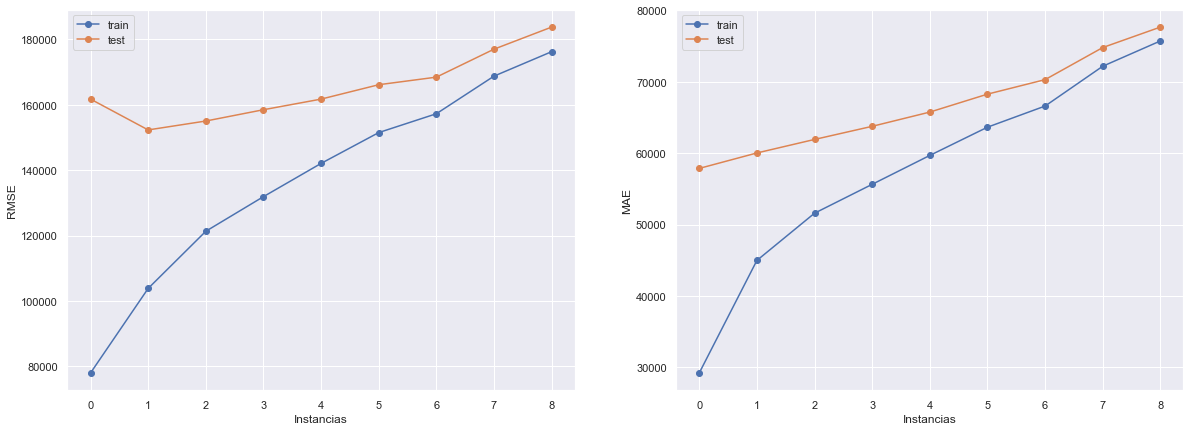

In [184]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(lista_accuracy_train,'o-',label='train' )
plt.plot(lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Instancias')
plt.ylabel('RMSE')

plt.subplot(1,2,2)
plt.plot(lista_mae_train,'o-',label='train' )
plt.plot(lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Instancias')
plt.ylabel('MAE')

#### *Podemos observar que el segundo modelo alcanza el menor RMSE en los Datos de Testeo, por debajo de 160.000*

#### *En cuanto al MAE, si bien las curvas son similares en ámbas métricas, en éste caso el error siempre fue menor cuanto más simple fue el modelo. Aún así, la diferencia entre el primer modelo y el segundo parece menos relevante en cuanto al aumento del error que la mejoría que se da entre éstos mismos modelos respecto al RMSE.*

#### Por lo tanto, el modelo de Vecinos más Cercanos que pareciera alcanzar el mejor rendimiento para este problema sería el **modelo con 3 vecinos como hiperparámetro.**

### Realizamos la misma prueba con el Arbol de Desición

In [186]:
lista_rmse_train = []
lista_rmse_test = []
lista_accuracy_test = []
lista_mae_test = []
n = 0
n_deep = [1,3,5,7,10,15,20,35,50]

for k in n_deep:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree = DecisionTreeRegressor(max_depth=n_deep[n], random_state=42)
    # Entrenar el modelo
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_rmse = rmse_train
    mae_train = mean_absolute_error(y_train, y_train_pred)
    train_mae = mae_train
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmse = rmse_test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    test_mae = mae_test
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    lista_accuracy_test.append(test_rmse)
    lista_mae_test.append(test_mae)
    
    
    n = n + 1

### Graficamos el **RMSE** y el **MAE** de cada modelo:

Text(0, 0.5, 'MAE')

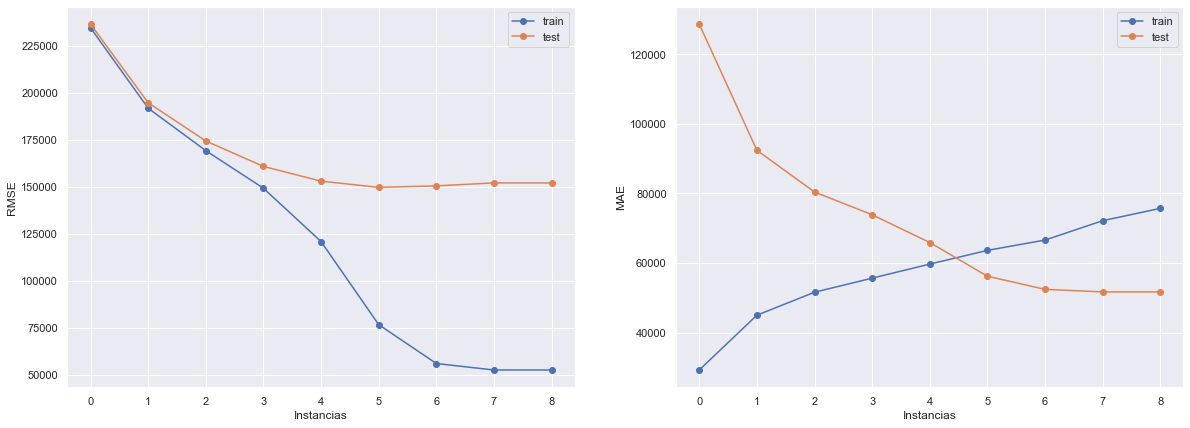

In [187]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(lista_rmse_train,'o-',label='train' )
plt.plot(lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Instancias')
plt.ylabel('RMSE')

plt.subplot(1,2,2)
plt.plot(lista_mae_train,'o-',label='train' )
plt.plot(lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Instancias')
plt.ylabel('MAE')

#### *Notamos que el menor RMSE con los datos de prueba se alcanza en el sexto modelo, que es un Arbol de Desición de  profundidad 15. Igualmente se puede observar como a partir del quinto (profundidad 10) el error se mantiene práctiamente inmutable hasta el último modelo evaluado.*

#### *Por otra parte, a diferencia de la prueba con Vecinos más Cercanos, aquí las curvas de RMSE y MAE se ven algo diferentes (sobre todo las de entrenamiento aunque eso no es lo más relevante en este momento). En cuanto al MAE en los datos de testeo, podemos apreciar un aplanamiento parecido de los errores del modelo pero en éste caso, dicha curva sigue mejorando notoriamente hasta llegar al sexto modelo (profundidad 15), es decir, se aplana un modelo después que respecto al RMSE, por lo que no parece verse afectado por la complejidad.*

#### Por lo tanto, respecto a Árboles de Desición, yo optaría por un **modelo con una profundidad: 15.** Ya que con esa complejidad parece seguir mejorando en una métrica (MAE) sin comprometer a la otra (RMSE). Igualmente hay que mencionar que a partir de los modelos mencionados, los siguientes no demuestran un error mayor pero tampoco una mejoría muy grande. Por lo tanto, yo optaría por no complejizar el modelo más de lo mencionado anteriormente porque no se aprecian mejoras significativas en los siguientes y en cambio si se aumenta el uso de recursos computacionales y principalmente, el **riesgo de sobreajustar** el modelo.

<h2 style="color:green">Conclusión Final:</h2>


Podemos advertir que tanto el Árbol de Desición, como el modelo de Vecinos más Cercanos tuvieron un "máximo rendimiento" similar en su mejor versión y ámbos fueron ámpliamente superiores al modelo benchmark elegido, que fue un modelo de regresión lineal. Si tuviera que optar por uno de los dos, utilizaría un Árbol de Desición con profundidad 15 ya que si bien el rendimiento de ese modelo es similar en ámbas metricas al mejor Vecinos más Cercanos, de ahí en adelante el promedio del error se mantuvo constante tanto para MAE como para RMSE en los siguientes Árboles, mientras que pareciera que Vecinos más Cercanos alcanza su límite de mejor rendimiento con hiperparámetro de 3 vecinos y de ahi en más comienza a aumentar los errores consistentemente, evidenciando un sobreajuste muy próximo y cada vez mayor. Por lo que pareciera mejor resolver éste problema con un modelo de Arbol de Desición.
Por lo tanto, el Arbol de Desición de profundidad 15 alcanza un menor nivel de error en ambas métricas, medidas que se mantienen de manera consistente en los arboles más profundos, no siendo igual con Vecinos más Cercanos, que encuentra su mejor rendimiento en un modelo bastante simple con únicamente 3 vecinos y de ahí en más siempre empeora a medida que se le agrega complejidad.

Por otro lado, no podemos dejar de notar que la magnitud del error arrojado es muy alta para ámbas métricas (teniendo en cuenta que es la misma magnitud que y, o sea, el precio). Teniendo en cuenta que ya hemos optimizado los modelos en busca del mejor hiperparámetro propondría algunas medidas para obtener un resultado mas satisfactorio:
* buscaría corregir el problema de los valores faltantes para no perder tanta información (en la columna surface_covered por ejemplo, este problema afecta a 21614 instancias).
* filtraría los outliers en busca de una distribución similar a la lograda en el Data Frame obtenido al final de la **Parte 2** del proyecto.
* considero que hay información muy importante en columnas -no numéricas- como por ejemplo l2 o property_type y la misma no ha sido aprovechada en los modelos utilizados aquí. Buscaría la manera de poder transformarla para lograr aprovecharla.
* debería también normalizarse la información del Dataset ya que en el mismo hay estalas muy dispares (cantidad de habitaciones, metros cuadrados cubiertos, precio en dolares), lo que podría estar afectando el peso que se le asigna a cada feature.
* a su vez, luego de procesar los datos de ésta manera, consideraría probar también con algún modelo mas robusto.

In [ ]:
k_fold = KFold(n_splits=8)

test_scores = []
for train_idx, test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = y[train_idx]
    
    Xtest = X[test_idx]
    Ytest = y[test_idx]
    
    model = DecisionTreeRegressor(max_depth=15, random_state=42)
    model.fit(Xtrain, Ytrain)
    
    test_scores.append(model.score(Xtest, Ytest))

In [ ]:
print('Mean score of K Folds: ', np.mean(test_scores))

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

In [ ]:
def rmse_score(y_test, y_pred):
    value = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    return np.sqrt(value)

def r2_score(y_test, y_pred):
    ssr = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    sst = (1/len(y_test))*np.sum((y_test - np.mean(y_test))**2)
    return (1 - (ssr/sst))

def mae_score(y_test, y_pred):
    return(1/len(y_test))*np.sum(np.abs(y_test - y_pred))

def adj_r2_score(y_test, y_pred, n_features):
    numerator = (1 - r2_score(y_test, y_pred))*(len(y_test) - 1)
    denominator = len(y_test) - n_features_ 1
    return (1 - (numerator/denominator))

In [ ]:
k_fold = KFlod(n_splits = 5)

rmse_scores = []
r2_scores = []
mae_scores = []
adj_r2_scores = []

for train_idx, test_idx in k_fold.split(x):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    model = LinearRegression()
    model.fit(Xtrain, Ytrain)    
    Ypred = model.predict(Xtest)
    
    rmse_scores.append(rmse_score(Ytest, Ypred))
    r2_scores.append(r2_score(Ytest, Ypred))
    mae_scores.append(mae_score(Ytest, Ypred))
    adj_r2_scores.append(adj_r2_score(Ytest, Ypred, Xtest.shape[:1]))
    
print('RMSE Promedio: ', np.mean(rmse_scores))
plt.plot(rmse_scores)
plt.plot([np.mean(rmse_scores)]*len(rmse_scores))
plt.title('RMSE')
plt.show()

print('MAE Promedio: ', np.mean(mae_scores))
plt.plot(mae_scores)
plt.plot([np.mean(mae_scores)]*len(mae_scores))
plt.title('MAE')
plt.show()

print('R2 Promedio: ', np.mean(r2_scores))
plt.plot(r2_scores)
plt.plot([np.mean(r2_scores)]*len(r2_scores))
plt.title('R2')
plt.show()

print('R2 Ajustado Promedio: ', np.mean(adj_r2_scores))
plt.plot(adj_r2_scores)
plt.plot([np.mean(adj_r2_scores)]*len(adj_r2_scores))
plt.title('R2 Ajustado')
plt.show()